In [474]:
library(ISLR) 
# Ref: ISLR Chap4, Lab

In [475]:
data(Smarket)

# data split : random (probably not of practical use for test in this case)

set.seed(42)
sample =sample.int(n = nrow(Smarket), size = floor(.8*nrow(Smarket)), replace = FALSE)
train = Smarket[sample,]
test  = Smarket[-sample,]

#### Data introduction

In [476]:
summary(train)

      Year           Lag1               Lag2                Lag3          
 Min.   :2001   Min.   :-4.92200   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.62925   1st Qu.:-0.629250   1st Qu.:-0.633750  
 Median :2003   Median : 0.04150   Median : 0.020000   Median : 0.046000  
 Mean   :2003   Mean   : 0.01289   Mean   : 0.005641   Mean   :-0.004998  
 3rd Qu.:2004   3rd Qu.: 0.59000   3rd Qu.: 0.607000   3rd Qu.: 0.585000  
 Max.   :2005   Max.   : 5.73300   Max.   : 5.408000   Max.   : 5.408000  
      Lag4               Lag5              Volume           Today         
 Min.   :-4.31800   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.92200  
 1st Qu.:-0.62075   1st Qu.:-0.62300   1st Qu.:1.2565   1st Qu.:-0.64025  
 Median : 0.04700   Median : 0.04400   Median :1.4401   Median : 0.04150  
 Mean   : 0.02887   Mean   : 0.02467   Mean   :1.4873   Mean   :-0.01089  
 3rd Qu.: 0.61425   3rd Qu.: 0.59300   3rd Qu.:1.6596   3rd Qu.: 0.59075  
 Max.   : 5.73300   Max. 

In [477]:
# convert year to factor
print(unique(train$Year))

train$Year=as.factor(train$Year)
test$Year=as.factor(test$Year)
table(train$Year) #balanced category

[1] 2003 2002 2005 2001 2004



2001 2002 2003 2004 2005 
 193  190  194  206  217 

In [478]:
head(train)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
561,2003,0.123,0.274,-0.505,2.612,1.214,1.49400,-0.186,Down
321,2002,-0.710,-0.620,-1.541,0.062,-0.142,1.37320,-0.152,Down
1177,2005,0.046,-0.328,-0.754,-0.074,0.796,2.07934,0.829,Up
1098,2005,0.018,0.385,-0.151,0.466,1.002,1.68100,-0.340,Down
1170,2005,1.262,-0.292,0.103,0.986,-0.319,1.93209,0.241,Up
634,2003,0.951,-1.462,1.181,-1.243,-0.633,1.43970,0.051,Up


In [479]:
names(train)

[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

In [480]:
dim(train)

[1] 1000    9

In [481]:
sapply(train,class)

Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume     Today 
 "factor" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 
Direction 
 "factor"

In [482]:
head(train)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
561,2003,0.123,0.274,-0.505,2.612,1.214,1.49400,-0.186,Down
321,2002,-0.710,-0.620,-1.541,0.062,-0.142,1.37320,-0.152,Down
1177,2005,0.046,-0.328,-0.754,-0.074,0.796,2.07934,0.829,Up
1098,2005,0.018,0.385,-0.151,0.466,1.002,1.68100,-0.340,Down
1170,2005,1.262,-0.292,0.103,0.986,-0.319,1.93209,0.241,Up
634,2003,0.951,-1.462,1.181,-1.243,-0.633,1.43970,0.051,Up


In [483]:
# check if target balanced or not
table(train$Direction) #balanced


Down   Up 
 480  520 

### EDA

In [484]:
sum(is.na(train))

[1] 0

In [485]:
corr=cor(train[,c(-1,-9)])
corr

#use pipe
#library(purrr)
#library(tidyr)
# correlation
#ds %>%
#    keep(is.numeric)%>%
#    cor

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Lag1,1.000000000,-0.023131408,-0.05528086,0.004403006,-0.016864768,0.053119007,-0.076821578
Lag2,-0.023131408,1.000000000,-0.03258889,-0.018317731,-0.009196027,-0.034617999,-0.023199050
Lag3,-0.055280858,-0.032588887,1.00000000,0.015604362,-0.013598872,-0.042969842,-0.055568326
Lag4,0.004403006,-0.018317731,0.01560436,1.000000000,0.004935103,-0.033991438,0.011880382
Lag5,-0.016864768,-0.009196027,-0.01359887,0.004935103,1.000000000,-0.006390319,-0.007291422
Volume,0.053119007,-0.034617999,-0.04296984,-0.033991438,-0.006390319,1.000000000,0.028736823
Today,-0.076821578,-0.023199050,-0.05556833,0.011880382,-0.007291422,0.028736823,1.000000000


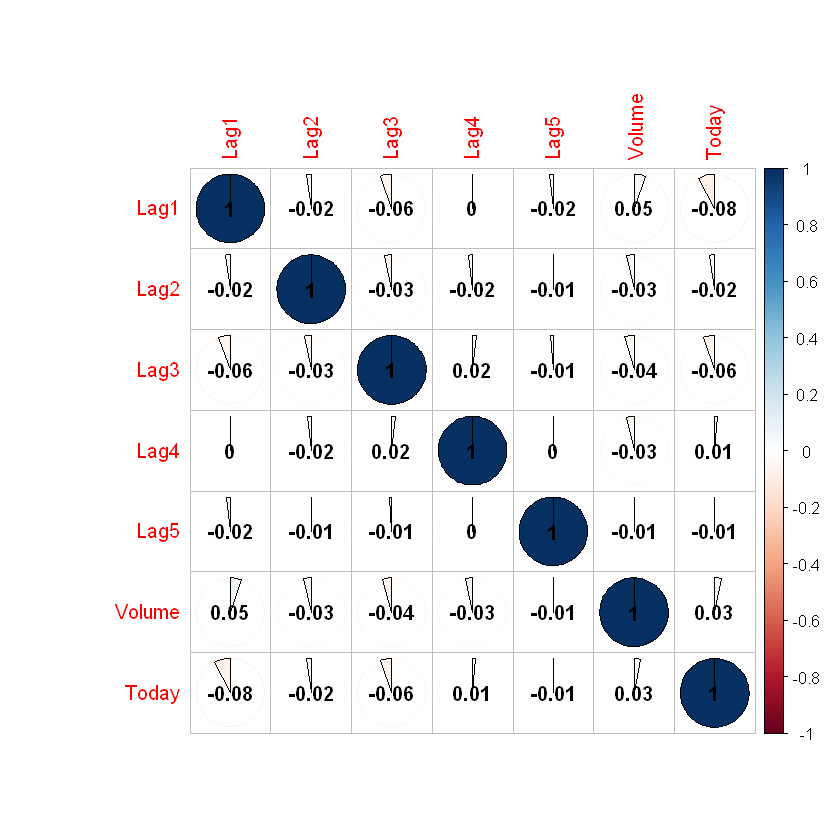

In [486]:
# plot correlation matrix
library(corrplot)
corrplot(corr,method='pie',addCoef.col = "black") #pie, circle, ellipse, shade, color, 

We see that features are not correlated amongst themselves. 

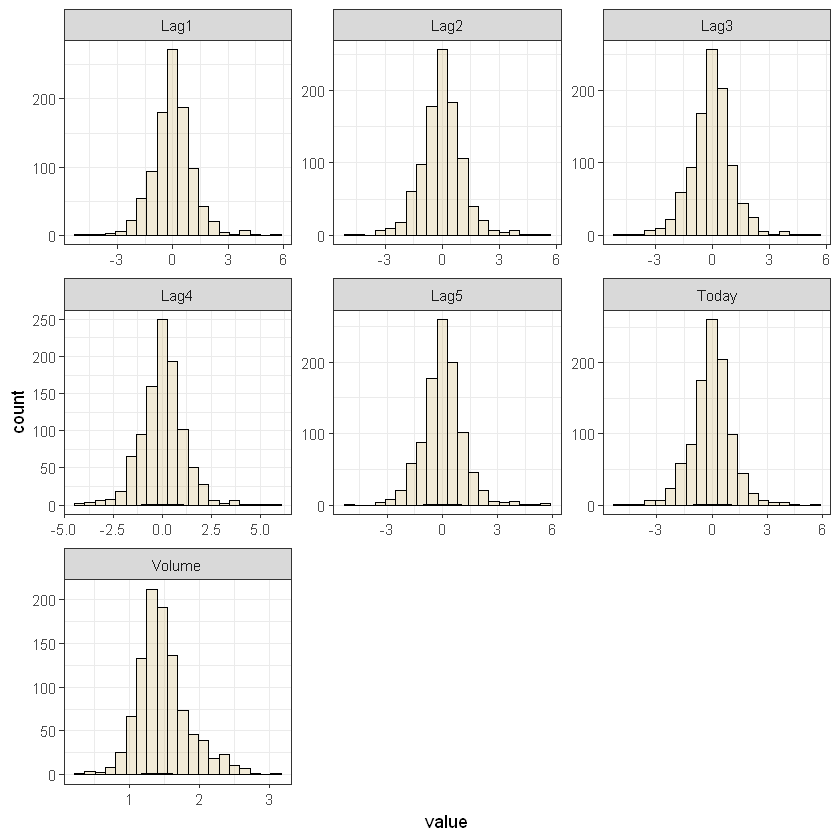

In [487]:
# ggplot histogram
library(purrr)
library(tidyr) #to use gather-- columns as variables -- value
library(ggplot2)

train %>% # this operator works like a pipe
  keep(is.numeric) %>% 
  gather() %>% 
  ggplot(aes(value)) +
    facet_wrap(~ key, scales = "free") + # like par(mfrow), wrt keys
    geom_histogram(bins = 20, color="black", fill ="#CFB87C", alpha = 0.3) +
    geom_density(alpha=1, fill="#FF6666") +
    theme_bw() # can use colors of factors (remove is.numeric condition then use)

In [488]:
# boxplots


In [489]:
# outliers

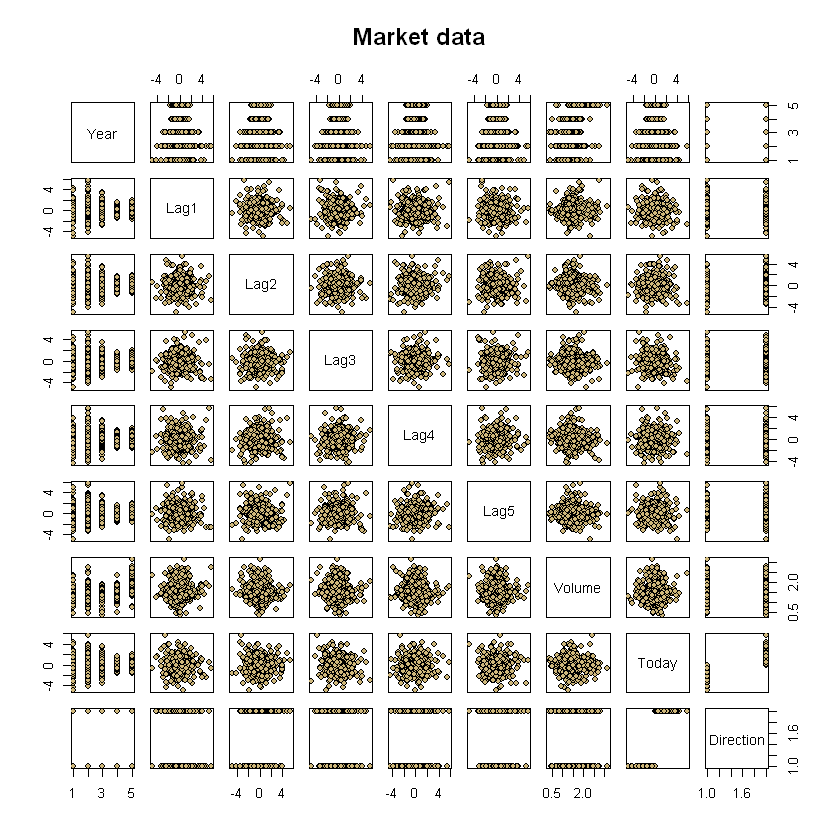

In [490]:
# pairwise scatterplot
#plot(train)
pairs(train, main = "Market data", pch = 21, bg = c("#CFB87C"))

### GLM basics

In [491]:
# note: 'Today'- perfectly categorises the 'Direction'
# hence we get an error
# It is also expected- as both features tell about the same output.
reg=glm(Direction~Today,train,family=binomial)

Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

In [492]:
# fit on everything but 'Today'
reg=glm(Direction~.-Today,train,family=binomial)
summary(reg)


Call:
glm(formula = Direction ~ . - Today, family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4359  -1.2233   0.9892   1.1024   1.6439  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) -0.02326    0.31817  -0.073   0.9417  
Year2002    -0.20307    0.21192  -0.958   0.3379  
Year2003     0.30701    0.20931   1.467   0.1424  
Year2004     0.34948    0.20818   1.679   0.0932 .
Year2005     0.47423    0.25819   1.837   0.0662 .
Lag1        -0.11789    0.05841  -2.018   0.0436 *
Lag2        -0.06919    0.05808  -1.191   0.2336  
Lag3        -0.01534    0.05879  -0.261   0.7941  
Lag4         0.03262    0.05796   0.563   0.5736  
Lag5         0.05420    0.05786   0.937   0.3489  
Volume      -0.06261    0.23178  -0.270   0.7871  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1384.7  on 999  degrees of freedom
Re

In [493]:
summary(reg)$coef
#coef(reg)

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-0.02326281,0.31816782,-0.07311491,0.94171467
Year2002,-0.20306959,0.21191986,-0.95823763,0.33794295
Year2003,0.30701384,0.20931150,1.46677958,0.14243603
Year2004,0.34947625,0.20817961,1.67872468,0.09320571
Year2005,0.47422791,0.25819162,1.83672848,0.06624999
Lag1,-0.11789225,0.05841264,-2.01826604,0.04356356
Lag2,-0.06919258,0.05808478,-1.19123421,0.23356165
Lag3,-0.01534160,0.05878968,-0.26095731,0.79412543
Lag4,0.03262252,0.05796463,0.56280036,0.57357084
Lag5,0.05419853,0.05786200,0.93668613,0.34892003


**NOTE** : Except Lag1 and Years, none of the predictors are significant, let's try by removing features.

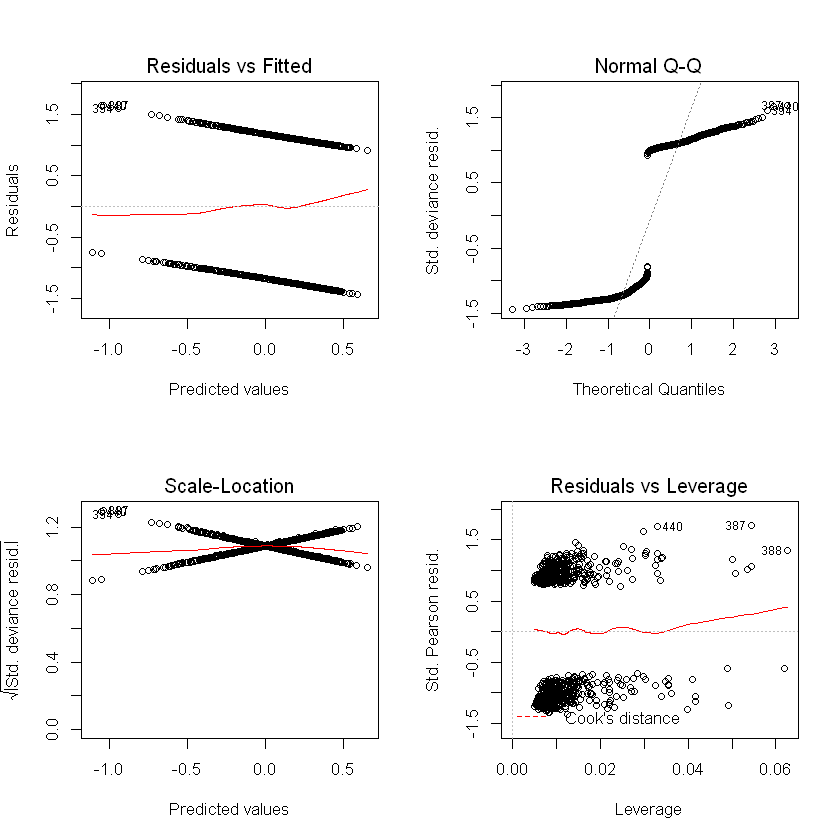

In [494]:
par(mfrow=c(2,2))
plot(reg) # note: here predicte values are the link function

#### Train Error

In [495]:
prob=predict(reg,type='response') #type= response(probability), link (link function), terms

#fix prob threshold get binary pred from prob
th=0.5
len=length(prob)
pred=rep('Down',len) #rep- replicate
pred[prob>=th]='Up'

In [496]:
contrasts(train$Direction) # what the factors are converted to

,Up
Down,0
Up,1


In [497]:
# confusion matrix
table(pred,train$Direction) #confusion matrix

      
pred   Down  Up
  Down  179 148
  Up    301 372

In [498]:
table(pred)

pred
Down   Up 
 327  673 

In [499]:
acc_naive=sum(train$Direction=='Up')/length(train$Direction)
acc_glm=sum(pred==train$Direction)/length(train$Direction)

cat('naive accuracy is',acc_naive, 'and pred accuracy is', acc_glm)

naive accuracy is 0.52 and pred accuracy is 0.551

In [500]:
# precision recall, F score

library(caret)

cm=confusionMatrix(as.factor(pred), train$Direction)

cm[["byClass"]][ "F1"]
cm[["byClass"]][ "Recall"]
cm[["byClass"]][ "Precision"]

F1 
0.4436183

Recall 
0.3729167

Precision 
0.5474006

### Model 2

In [501]:
# model with Year*lag1
reg2=glm(Direction~Lag1*Year,train,family=binomial)
summary(reg2)


Call:
glm(formula = Direction ~ Lag1 * Year, family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4841  -1.2333   0.9672   1.1042   1.8009  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)  
(Intercept)   -0.093548   0.144153  -0.649   0.5164  
Lag1          -0.008101   0.110808  -0.073   0.9417  
Year2002      -0.224165   0.207477  -1.080   0.2800  
Year2003       0.282734   0.204312   1.384   0.1664  
Year2004       0.331996   0.201399   1.648   0.0993 .
Year2005       0.428056   0.199788   2.143   0.0321 *
Lag1:Year2002 -0.192308   0.146255  -1.315   0.1885  
Lag1:Year2003 -0.026452   0.177532  -0.149   0.8816  
Lag1:Year2004 -0.131342   0.228079  -0.576   0.5647  
Lag1:Year2005 -0.235395   0.239807  -0.982   0.3263  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1384.7  on 999  degrees of freedom
Residual deviance:

In [502]:
prob2=predict(reg2,type='response') #type= response(probability), link (link function), terms

#fix prob threshold get binary pred from prob
th=0.5
len=length(prob2)
pred2=rep('Down',len) #rep- replicate
pred2[prob2>=th]='Up'

In [503]:
acc_glm2=sum(pred2==train$Direction)/length(train$Direction)
acc_glm2

[1] 0.575

In [504]:
cm2=confusionMatrix(as.factor(pred2), train$Direction)

cm2[["byClass"]][ "F1"]
cm2[["byClass"]][ "Recall"]
cm2[["byClass"]][ "Precision"]

F1 
0.4922342

Recall 
0.4291667

Precision 
0.5770308

**NOTE**: Although, we have barely any significant variable but scores have improved on the train set.

### Model 3

In [505]:
# model with lag1, no intercept
reg3=glm(Direction~Lag1-1,train,family=binomial)
summary(reg3)


Call:
glm(formula = Direction ~ Lag1 - 1, family = binomial, data = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.405  -1.171   1.094   1.177   1.428  

Coefficients:
     Estimate Std. Error z value Pr(>|z|)  
Lag1 -0.10584    0.05728  -1.848   0.0646 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1386.3  on 1000  degrees of freedom
Residual deviance: 1382.8  on  999  degrees of freedom
AIC: 1384.8

Number of Fisher Scoring iterations: 3


In [506]:
prob3=predict(reg3,type='response') #type= response(probability), link (link function), terms

#fix prob threshold get binary pred from prob
th=0.5
len=length(prob3)
pred3=rep('Down',len) #rep- replicate
pred3[prob3>=th]='Up'

In [507]:
acc_glm3=sum(pred3==train$Direction)/length(train$Direction)
acc_glm3

[1] 0.54

In [508]:
cm3=confusionMatrix(as.factor(pred3), train$Direction)

cm3[["byClass"]][ "F1"]
cm3[["byClass"]][ "Recall"]
cm3[["byClass"]][ "Precision"]

F1 
0.54

Recall 
0.5625

Precision 
0.5192308

## Diagnostics GLM model

Ref:https://rpubs.com/benhorvath/glm_diagnostics

GLM assumptions-
1. There are no outliers
2. The link function is correct.
3. All important independent variabbles are used and each is linear
4. The correct variance function V(μ) is used (since GLMs posit mean and variance are proportional to eachother and not constant)
5. The dispersion parameter is constant. (dispersion parameter: how wide is the dist of Y, fixed to 1 in glm)
6. The response yi are independent of eachother
7. The response variable comes from the specified distribution

Check these assumptions. Also list solution wrt each assumption.

Steps:
1. Plot all residual densities, see type of distribution, range of values. 
2. Compare density of fitted and actual response.
3. Plot residual wrt predicted (response and link) and predictors
4. QQplot of qresid
5. Cooks distsnce
6. VIF multicollinearity


Solutions:
1. Change the link function.
2. Change the family for response.
3. Transform data
4. Use different dispersion parameter- via- quasi families
5. Remove outliers

Ref: for options of families and links https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/family
 Also variance function (i.e. how var depends on mean) for quasi distribution.
 
Ref: CI https://www.datascienceblog.net/post/machine-learning/interpreting_generalized_linear_models/

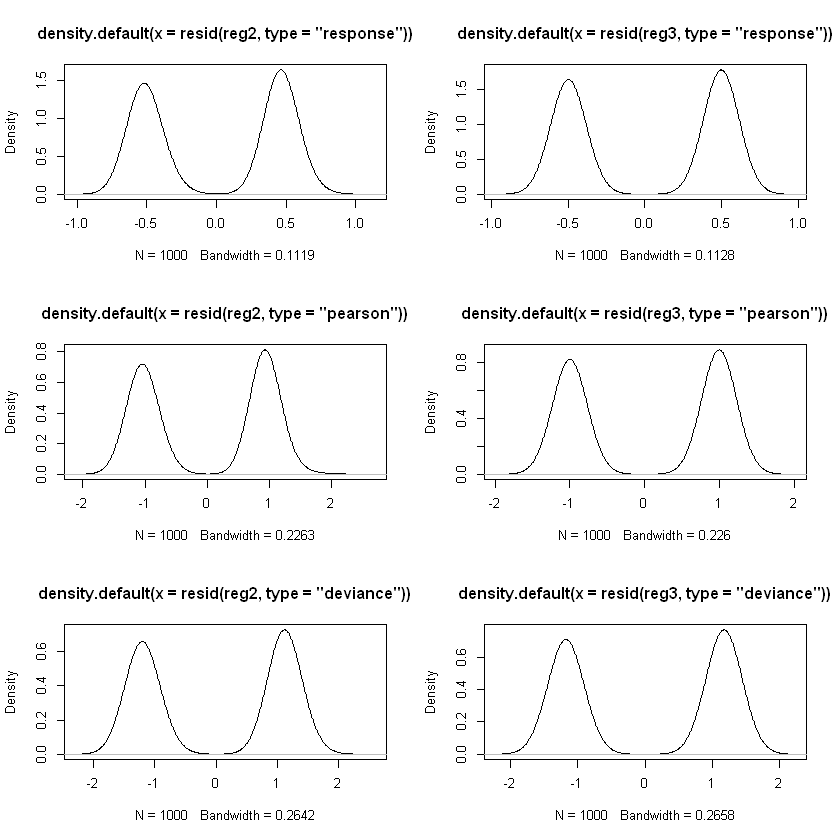

In [509]:
#plot all residuals

# resid
par(mfrow=c(3,2))
plot(density(resid(reg2, type='response'))) # usual residual
plot(density(resid(reg3, type='response')))
plot(density(resid(reg2, type='pearson')))
plot(density(resid(reg3, type='pearson')))
plot(density(resid(reg2, type='deviance'))) # preffered
plot(density(resid(reg3, type='deviance')))

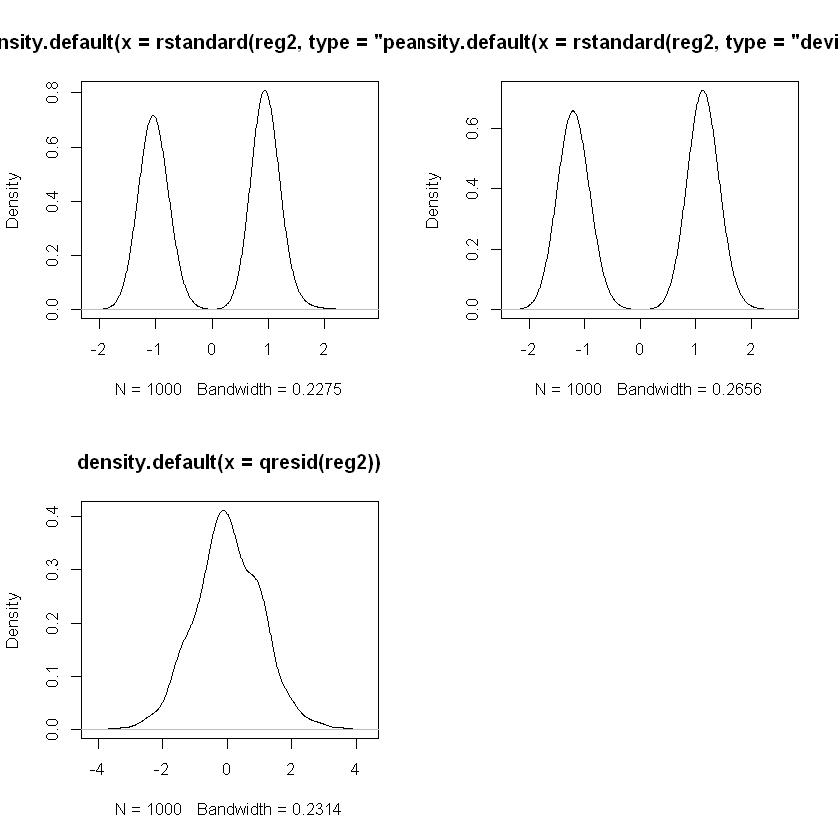

In [510]:
# more residual plots
library(statmod) # for qresid

par(mfrow=c(2,2))
plot(density(rstandard(reg2, type='pearson'))) # standardised, to see constant variance of residuals
plot(density(rstandard(reg2, type='deviance')))
plot(density(qresid(reg2)))# smoother distribution, approximates a normal, for discrete response

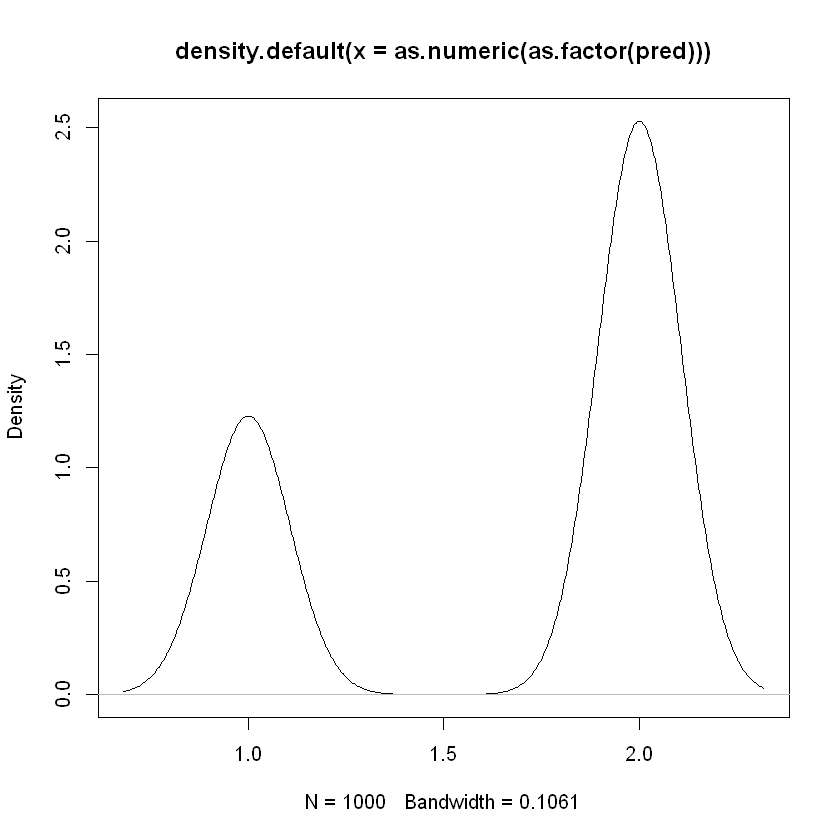

In [511]:

plot(density(as.numeric(as.factor(pred))))

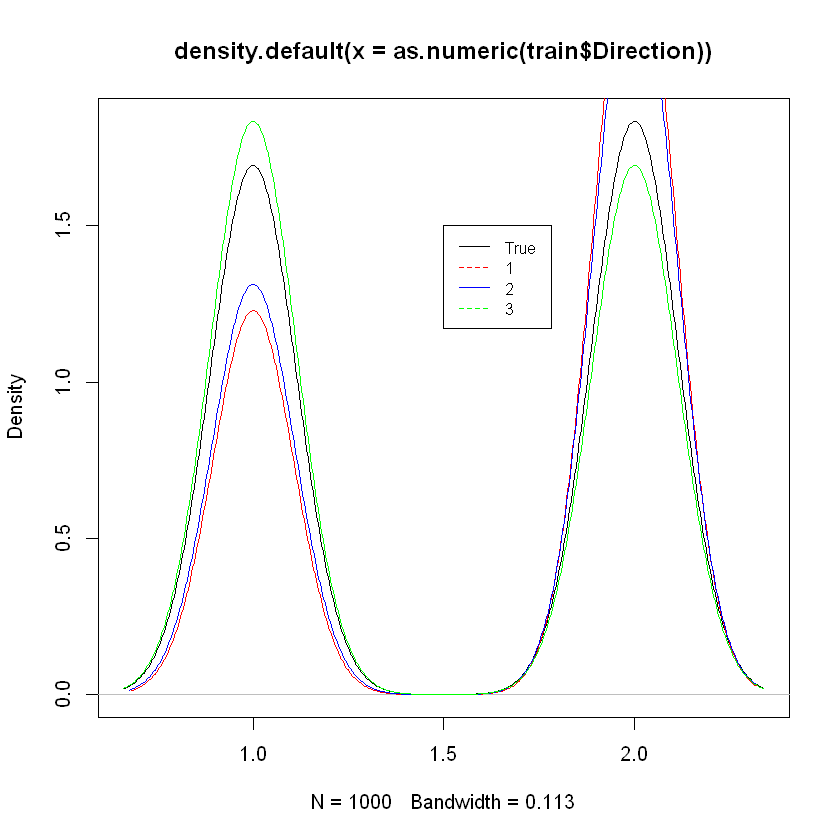

In [512]:
# density fitted vs actual
#par(mfrow=c(2,2))
plot(density(as.numeric(train$Direction)))
lines(density(as.numeric(as.factor(pred))), col='red')
lines(density(as.numeric(as.factor(pred2))), col='blue')
lines(density(as.numeric(as.factor(pred3))), col='green')
legend(1.5, 1.5, legend=c("True", "1",'2','3'),
       col=c('black','red','blue','green'), lty=1:2, cex=0.8)

We see model 3 gives best fit to true distribution.

In [513]:
# independence of observations-- plot of rstandard(deviance) wrt index or datetime
# should show no pattern


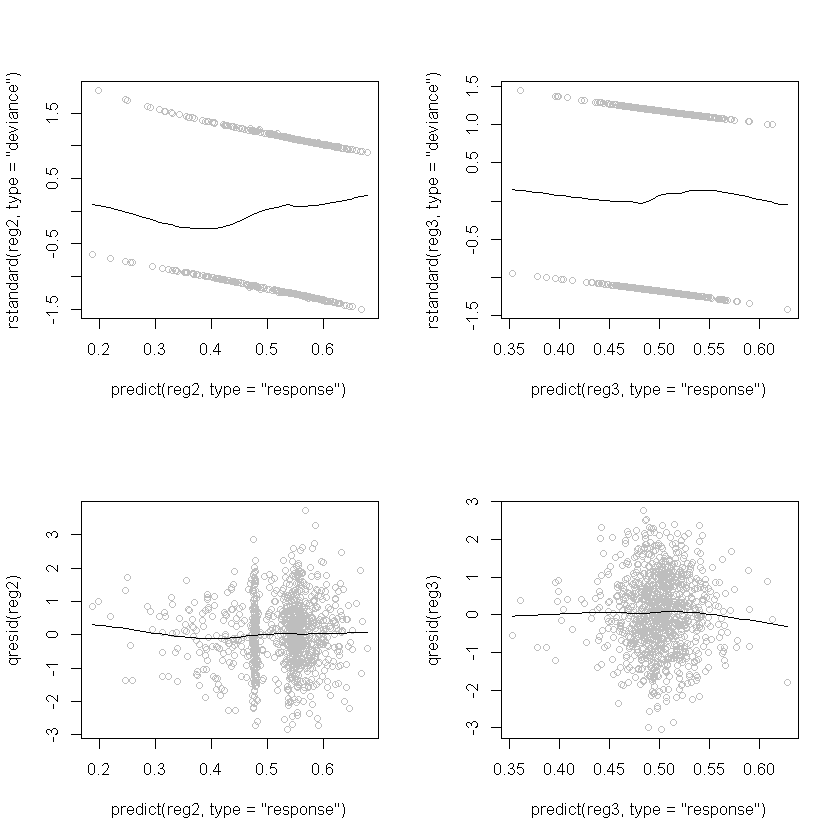

In [514]:
# residual should not increase or decrease with value of response
par(mfrow=c(2,2))
scatter.smooth(predict(reg2, type='response'), rstandard(reg2, type='deviance'), col='gray')
scatter.smooth(predict(reg3, type='response'), rstandard(reg3, type='deviance'), col='gray')
scatter.smooth(predict(reg2, type='response'), qresid(reg2), col='gray') # can use transf on y to see pattern
scatter.smooth(predict(reg3, type='response'), qresid(reg3), col='gray')

We see that the residuals wrt positive and negative class form two parallel lines, which remain parallel, net residual i.e. the line betwee them remains constant (almost).

For the qresid- we see the net-line remains in the center, i.e. there is no pattern.



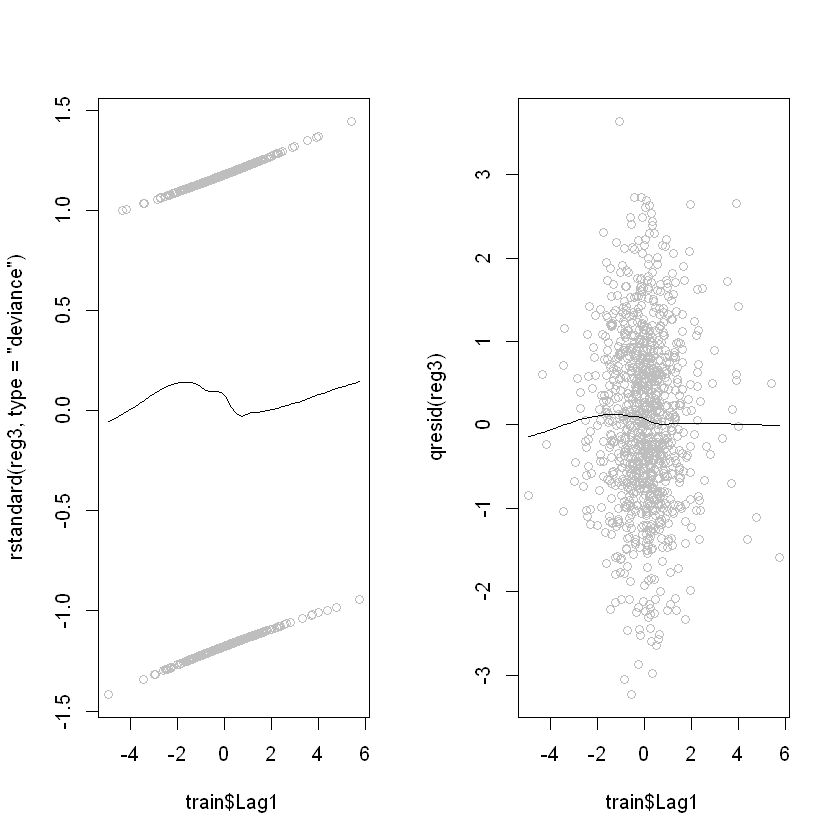

In [515]:
# residuals should also not show any pattern wrt predictors
par(mfrow=c(1,2))
scatter.smooth(train$Lag1, rstandard(reg3, type='deviance'), col='gray')
scatter.smooth(train$Lag1, qresid(reg3), col='gray')

Some pattern exists around Lag1=0. 

### Correctness of link function

Residual vs link (i.e. predict(typr='link')) should not show any pattern.

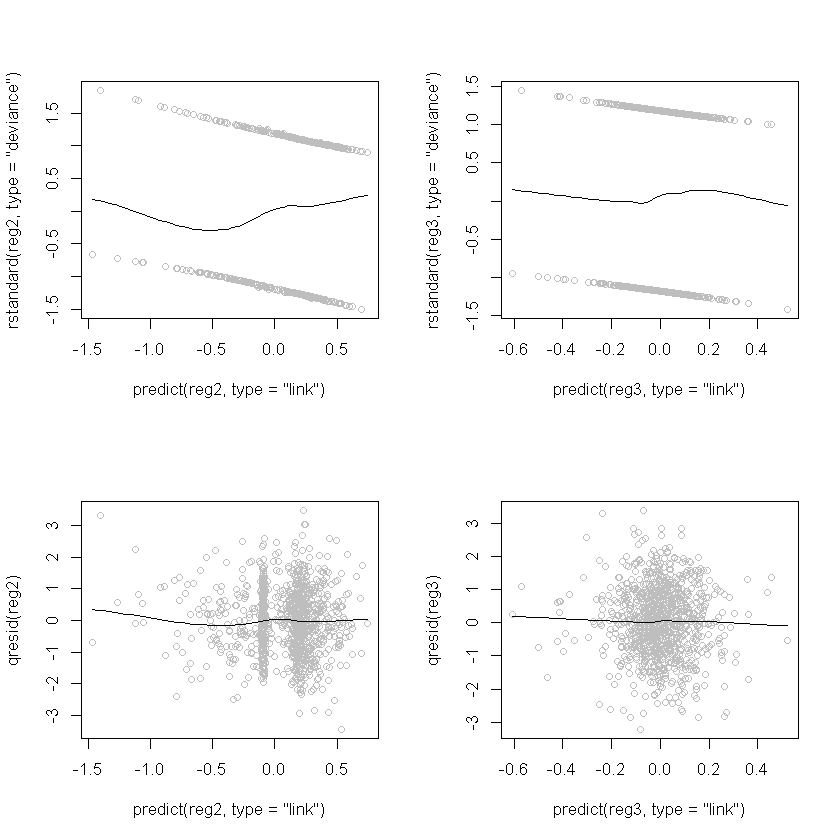

In [516]:
par(mfrow=c(2,2))
scatter.smooth(predict(reg2, type='link'), rstandard(reg2, type='deviance'), col='gray')
scatter.smooth(predict(reg3, type='link'), rstandard(reg3, type='deviance'), col='gray')
scatter.smooth(predict(reg2, type='link'), qresid(reg2), col='gray') # can use transf on y to see pattern
scatter.smooth(predict(reg3, type='link'), qresid(reg3), col='gray')

### Corretness of choice of distribution

QQplot of quartile residuals should show normal

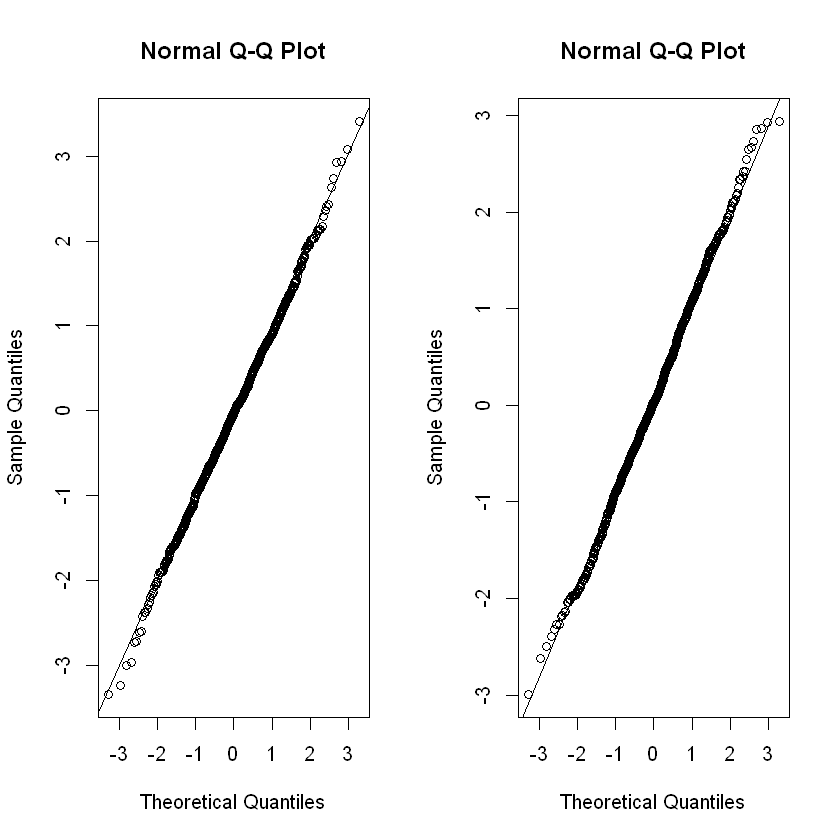

In [517]:
par(mfrow=c(1,2))
qqnorm(qresid(reg2)); qqline(qresid(reg2))
qqnorm(qresid(reg3)); qqline(qresid(reg3))

### Outlier and influential observations

Outliers: 2*mean(cooks_distance)-- rough guess


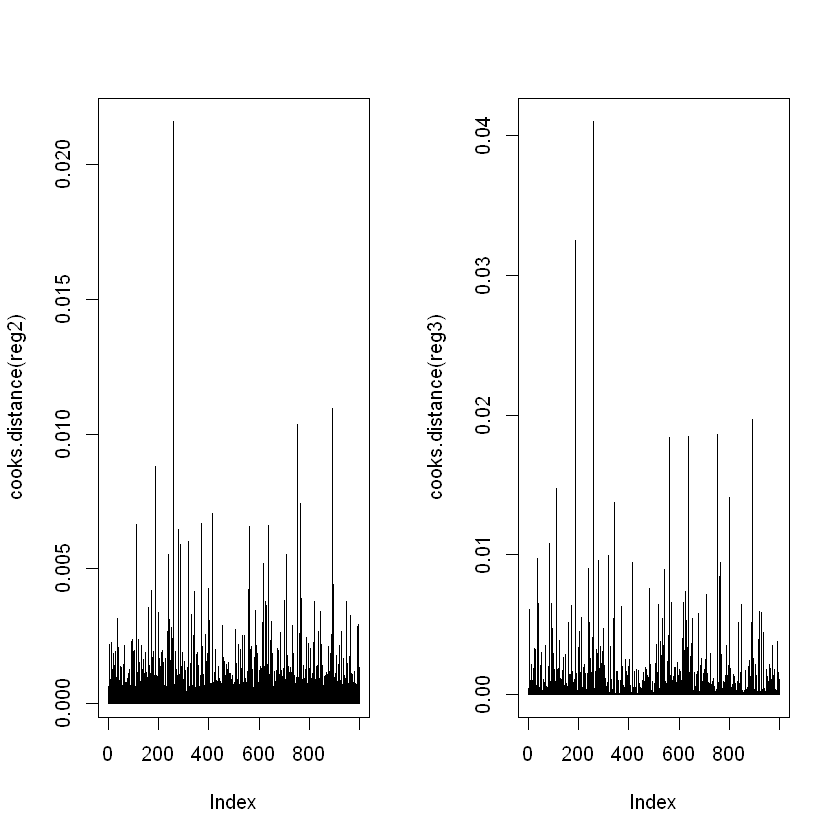

In [518]:
par(mfrow=c(1,2))
plot(cooks.distance(reg2), type='h')
plot(cooks.distance(reg3), type='h')

We see model 3 has lower (almost half) cook distance.

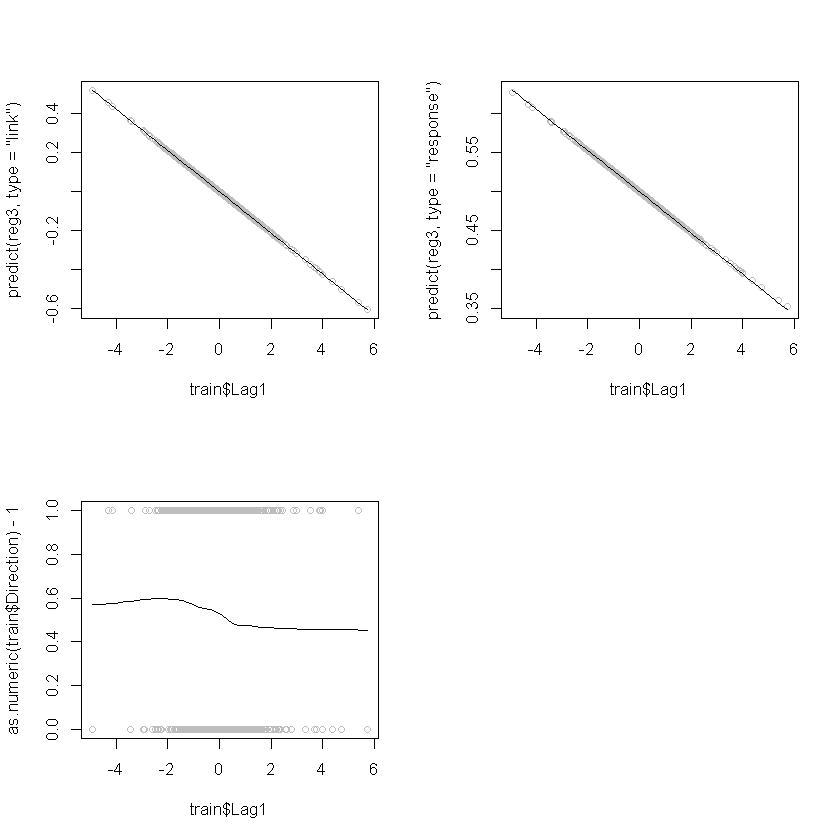

In [519]:
# plot preditction vs predictor
par(mfrow=c(2,2))
scatter.smooth(train$Lag1,predict(reg3, type='link'), col='gray')
scatter.smooth(train$Lag1,predict(reg3,type='response'), col='gray')
scatter.smooth(train$Lag1,as.numeric(train$Direction)-1, col='gray')

We see the probability changes between below and above 0.5 at Lag1=0. As expected.

## Test set

In [520]:
prob_test2=predict(reg2,test,type='response') #type= response(probability), link (link function), terms

#fix prob threshold get binary pred from prob
th=0.5
len=length(prob_test2)
pred_test2=rep('Down',len) #rep- replicate
pred_test2[prob_test2>=th]='Up'


prob_test3=predict(reg3,test,type='response') #type= response(probability), link (link function), terms

#fix prob threshold get binary pred from prob
th=0.5
len=length(prob_test3)
pred_test3=rep('Down',len) #rep- replicate
pred_test3[prob_test3>=th]='Up'

In [521]:
cat('Model 2\n')
cm2=confusionMatrix(as.factor(pred_test2), test$Direction)
acc_glm2=sum(pred_test2==test$Direction)/length(test$Direction)

cat('acc model2',acc_glm2)
cm2[["byClass"]][ "F1"]
cm2[["byClass"]][ "Recall"]
cm2[["byClass"]][ "Precision"]



cat('Model 3\n')
cm3=confusionMatrix(as.factor(pred_test3), test$Direction)
acc_glm3=sum(pred_test3==test$Direction)/length(test$Direction)

cat('acc model3',acc_glm3)
cm3[["byClass"]][ "F1"]
cm3[["byClass"]][ "Recall"]
cm3[["byClass"]][ "Precision"]


Model 2
acc model2 0.484

F1 
0.4109589

Recall 
0.3688525

Precision 
0.4639175

Model 3
acc model3 0.536

F1 
0.536

Recall 
0.5491803

Precision 
0.5234375

Out of model2 and model3 -- choose model3, based on above metrics.

### Confidence interval 

#### CI parameter

In [522]:
round(confint(reg3),4) #profile CI

Waiting for profiling to be done...


2.5 %  97.5 % 
-0.2191  0.0058

In [523]:
round(confint.default(reg3),4) # Wald CI, based on assumption of normality in beta

,2.5 %,97.5 %
Lag1,-0.2181,0.0064


In [524]:
summary(reg3)$coefficients

,Estimate,Std. Error,z value,Pr(>|z|)
Lag1,-0.1058373,0.05727996,-1.847719,0.064643


In [525]:
# CI by hand
# lower CI for beta
(summary(reg3)$coefficients[1,1]-1.96*summary(reg3)$coefficients[1,2]) # 1.96 as 2.5% in Z

# upper CI for beta
(summary(reg3)$coefficients[1,1]+1.96*summary(reg3)$coefficients[1,2])
print('matches with Wald CI')

[1] -0.218106

[1] 0.006431452

[1] "matches with Wald CI"


#### CI different scales

USing the CI of parameters, we can find CI for different scales like- probability, odds, log odds, odds ration etc.

Ref: https://stats.stackexchange.com/questions/354098/calculating-confidence-intervals-for-a-logistic-regression

#### CI prediction
**se.fit=T** yields standard errors of the prediction, i.e. a measure of uncertainty for the predicted value i.e the link. This prediction, by one of the Central Value Theorems, can be assumed to be normally distributed at the **link scale.**

Use se.fit only with type='link'.

In [526]:
# see explicitly the relation between response/probability and link/logit
head(predict(reg3,test,type='response'),2)
head(exp(predict(reg3,test,type='link'))/(1+exp(predict(reg3,test,type='link'))),2) # inverse logit of link gives prob

# so we see how to convert the CI of link into CI of pred

4         5 
0.5164782 0.4837597

4         5 
0.5164782 0.4837597

In [527]:
alpha=0.05
# CI of link

ci.factor = qnorm(1 -  alpha/2)
pci=predict(reg3,test,se.fit=TRUE, level=1-alpha,type='link')

link_lwr=pci$fit - ci.factor * pci$se.fit
link_upr=pci$fit + ci.factor * pci$se.fit

In [528]:
# CI for prediction

inverse_logit = function(x){
  exp(x)/(1+exp(x))
}

pred_lwr=inverse_logit(link_lwr)
pred_upr=inverse_logit(link_upr)
#true=invese_logit(pci$fit)
pred_m=predict(reg3,test,type='response')

,pred_m,lwr,upr
4,0.5164782,0.4989986,0.5339175
5,0.4837597,0.4665710,0.5009869
7,0.4632351,0.4246775,0.5022374
9,0.4992856,0.4985278,0.5000434
12,0.5131737,0.4991995,0.5271273
15,0.4814605,0.4618516,0.5011267


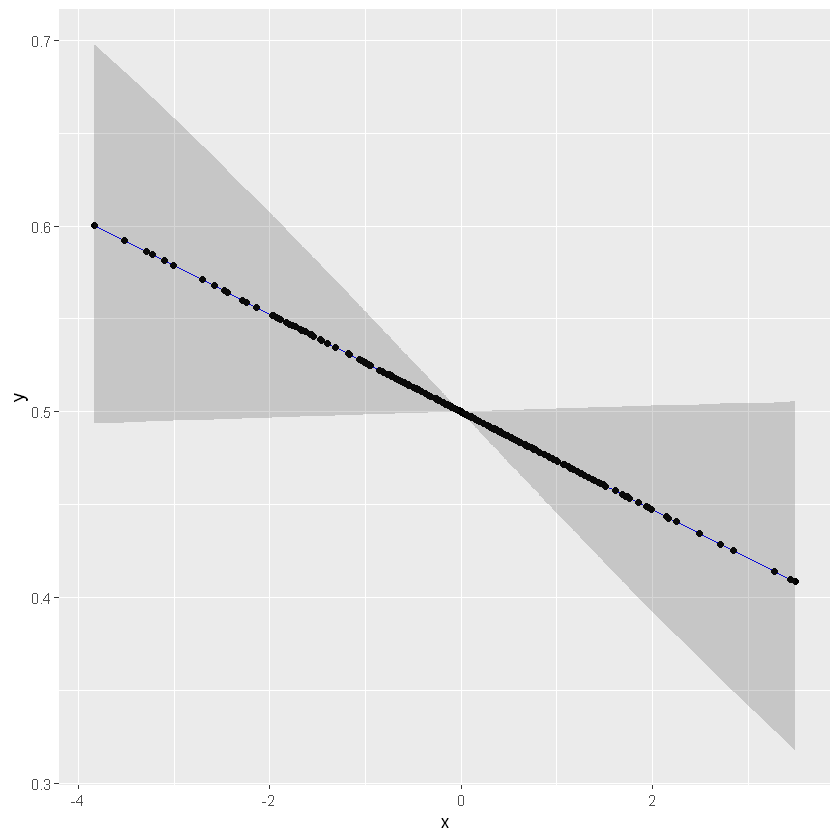

In [529]:
# plotting probability prediction intervals
# make df
df= data.frame('pred_m'=pred_m, "lwr" = pred_lwr, "upr" = pred_upr)
head(df)

ggplot(df, aes_string(x = test$Lag1,y = pred_m)) + 
      geom_line(colour = "blue") + 
      geom_point() + 
      geom_ribbon(aes(ymin = lwr, ymax = upr), alpha = 0.2) 

## LDA Basics

In [530]:
library(MASS)
lda.fit=lda(Direction~.-Year-Today,data=train)
#qda.fit=qda()

In [531]:
lda.fit

Call:
lda(Direction ~ . - Year - Today, data = train)

Prior probabilities of groups:
Down   Up 
0.48 0.52 

Group means:
            Lag1        Lag2         Lag3        Lag4        Lag5   Volume
Down  0.08153542  0.04150625 -0.011677083 0.003410417 -0.01339167 1.473297
Up   -0.05047885 -0.02746538  0.001167308 0.052373077  0.05979615 1.500315

Coefficients of linear discriminants:
               LD1
Lag1   -0.63300151
Lag2   -0.31230274
Lag3    0.03383194
Lag4    0.23623382
Lag5    0.32975035
Volume  1.24582581

In [532]:
lda.pred=predict(lda.fit) #directly gives class not probability

In [533]:
names(lda.pred)

[1] "class"     "posterior" "x"

In [534]:
table(lda.pred$class,Direction) #confusion matrix

      Direction
       Down  Up
  Down  155 141
  Up    325 379

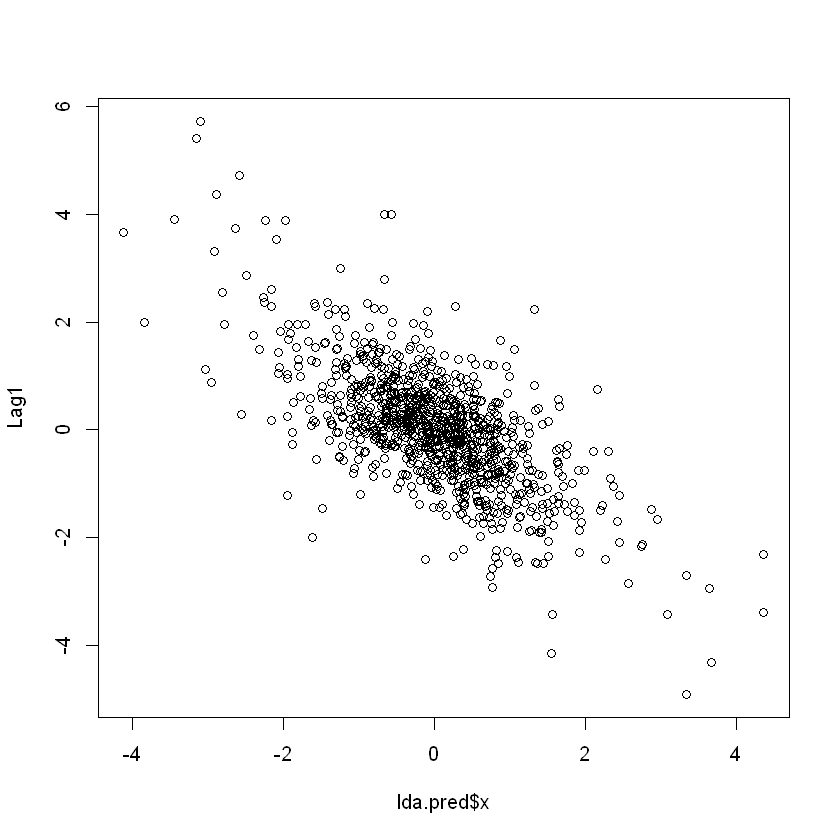

In [535]:
plot(lda.pred$x,Lag1) # more the x (LDA factor) more the prob of being in Direction=1 and not 0

### KNN

In [536]:
# knn()

### Inference

Coef increase decrease meaning. 

### Comparing models

#### train test set
 accuracy, confusion matrix, AIC, BIC etc.

